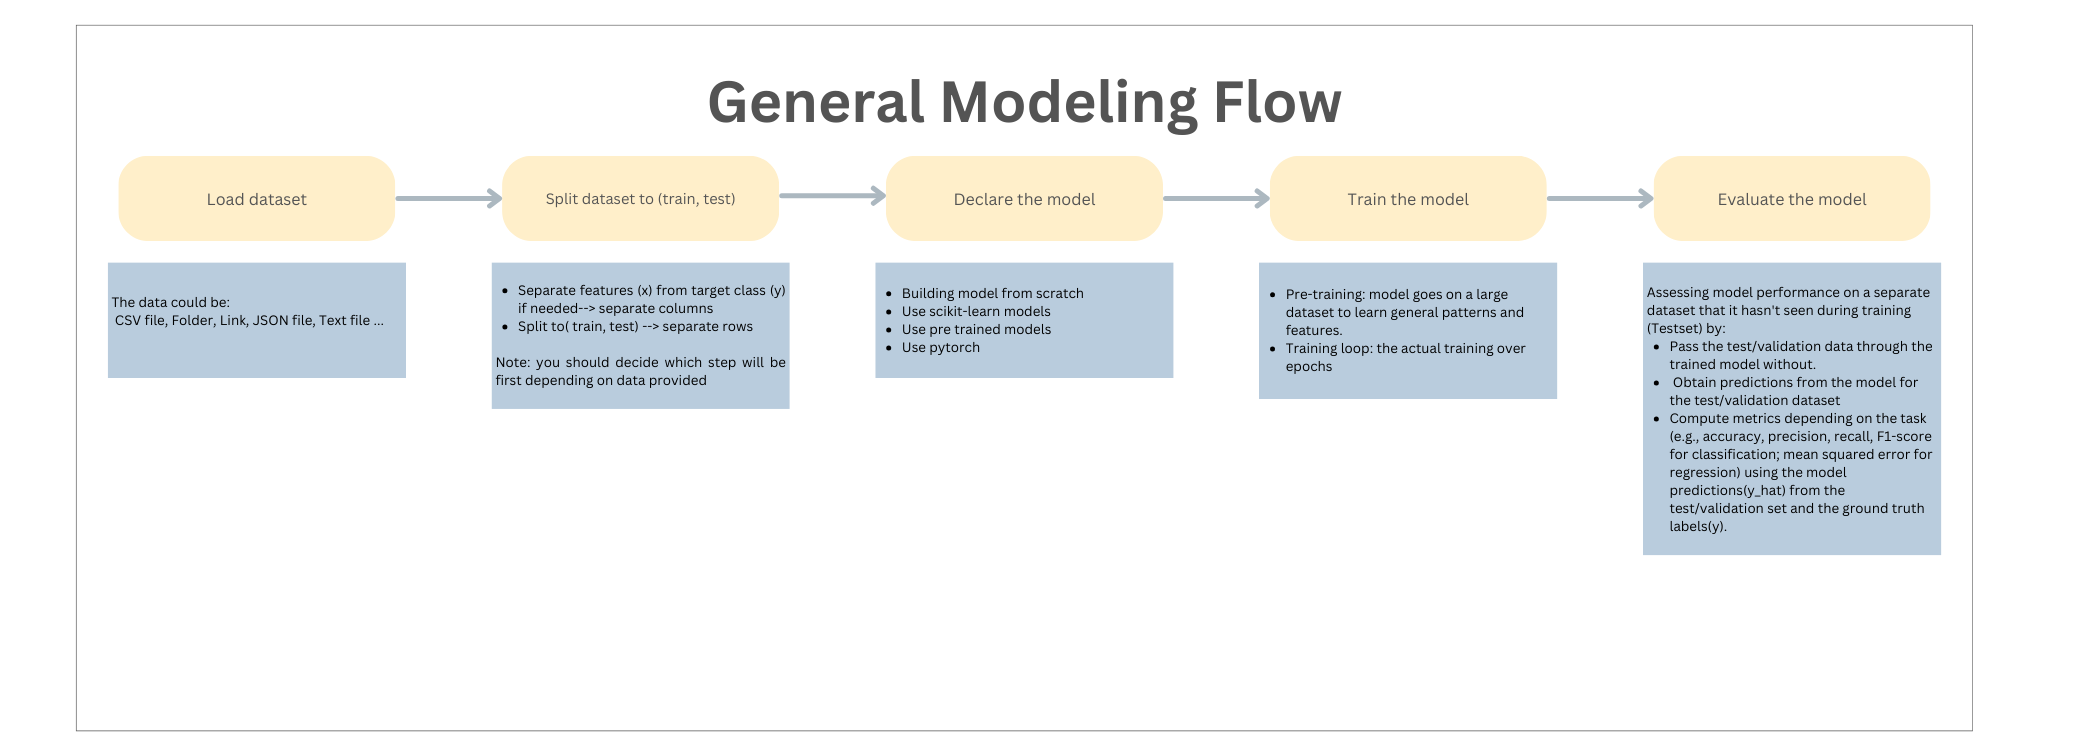

 ## Linear Regression

**Steps for Linear Regression:**
1. Feature Engineering
2. Split the data (into training,test)
3. Calculate Theta
4. Calaculate w*x + b
5. loss function: Mean Square Error
6. Getting the accuracy


## Example 1

In [ ]:
# Step 1: Normalization
# The normalization formula ensures that all features have a similar scale and are centered around zero.
# This improves the model's learning efficiency and ensures fair treatment of all features.
X = (df - df.mean()) / (df.max() - df.min())

# Step 2: Feature Engineering

#Step 3: splitting the data
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.2,random_state=0)

#Cont. Step 3 you could add shuffling by setting shuffle = true
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.2,random_state=0, shuffle = true)

#Step 4: Building the model
# The normal equation directly computes the optimal weights for linear regression without needing iterative optimization (like gradient descent).
w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

#Step 5: Training The model
# This calculates the predicted values (y_pred) for the training data by multiplying the input features (x_train) with the weights (w).
y_pred = np.dot(x_train,w)

#Step 6: Getting the loss
def mean_squared_error(y_train, y_pred): # Computes the difference between the actual values (y_train) and the predicted values (y_pred).
  return np.mean(((y_train) - (y_pred))**2) # Squares the differences to avoid negative values and emphasize larger errors.


## Example 2

In [ ]:
#Step 0: Reading from .csv file
df = pd.read_csv('Salary_dataset.csv')

#-----------------Feature Engineering----------------------
#df = df.drop(	'Unnamed: 0', axis =1 ) in case of dropping a cloumns
# df['YearsExperienceSalary'] = df['YearsExperience'] * df['Salary'] example of adding a new feature,syntax: nameOfDataSet['Name of feature']

#Step 1: x
x = (df - df.mean()) / (df.max() - df.min()) # Normalize the dataset to ensure all features are on a similar scale. This helps the model train more efficiently.

#Step 2: y
y = df['Salary'] # Extract the target variable (Salary) from the dataset, as this is what the model will learn to predict.

#Step 3: Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Step 4:
x_train = x_train.T # WHY Transpose x_train so that each column represents a sample, and rows represent features.
# This matches the matrix format needed for linear algebra in the model.

#Step 5:
# Convert y_train and y_test into numpy arrays for compatibility with numerical operations in the model.
y_train = np.array([y_train])

#Step 6:
x_test = x_test.T ??

#Step 7:
y_test = np.array([y_test])

#Step 8: Defining Helper functions
# Initialize the weights (w) and bias (b) for the linear regression model. Random weights are used to start the training.
def initilize_parameters(n):
  w = np.random.rand(1, n)
  b = 0

  return w, b
#----------------------
def forward(X, w, b): # Calculate the predictions (z) using the formula

  z = np.dot(w, X) + b # Compute the linear output

  return z
#----------------------
def cost_function(z, y):
  m = y.shape[1]
  J = (1 / (2 * m) * np.sum(np.square(z - y))) # Mean Squared Error

  return J
#----------------------
def back_prop(X, y, z):
  m = y.shape[1] # Number of columns (samples in this case).

  dz = (1 / m) * (z - y)  # Gradient of loss with respect to predictions

  dw = np.dot(dz, X.T)  # Gradient of loss with respect to weights

  db = np.sum(dz) # Gradient of loss with respect to bias

  return dw, db
#----------------------
def gradient_descent_update(w, b, dw, db, lr) # Update w and b using the gradients and learning rate (lr).

  w -=  lr * dw
  b -= lr * db

  return w, b
#----------------------

#Step 9: Traning The model & printing the ouputs & plotting
 def linear_regression_model(x_train, y_train, x_test, y_test, lr, epochs):

  n = x_train.shape[0] # Number of features
  w, b = initilize_parameters(n)  # Initialize weights and bias
  costs_train = []  # Store training costs for plotting
  m_train = y_train.shape[1]  # Number of training samples
  m_test = y_test.shape[1] # Number of testing samples

  # Training
  for i in range(epochs):

    y_pre = forward(x_train, w, b)
    cost_train = cost_function(y_pre, y_train)

    dw, db = back_prop(x_train, y_train, y_pre)
    w, b = gradient_descent_update(w, b, dw, db, lr)


    if i % 10 == 0: # Save cost every 10 iterations for plotting
      costs_train.append(cost_train)

    y_pre_test = forward(x_test, w, b)  # Forward pass for test data
    cost_test = cost_function(y_pre_test, y_test)  # Calculate testing cost


    # print cost_train, cost_val, MAE_train, MAE_val
    print(f'Epochs {i + 1} / {epochs}: ')
    print(f'Training cost {cost_train} | Testing cost {cost_test}')

  # Plot Training Cost
  plt.plot(costs_train)
  plt.xlabel('Iterations(per tens)')
  plt.ylabel('Training cost')
  plt.title('Learning rate ' + str(lr))
  plt.show()


## Example 3

In [ ]:
#Using sklearn.datasets

#Step 0: importing the dataset
from sklearn.datasets import fetch_california_housing

#Step 1: storing the dataset in a variable
data = fetch_california_housing()

#Step 2: Convert it as a DataFrame
df = pd.DataFrame(data['data'])

#Step 3: setting y
data['target'] #it should be like this syntax by selecting a suitable target from the dataset

#Step 4: setting x
X = (df - df.mean()) / (df.max() - df.min())

#-----------------Feature Engineering----------------------
#Step 3: Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Step 4:
x_train = x_train.T

#Step 5:
y_train = np.array([y_train])

#Step 6:
x_test = x_test.T

#Step 7:
y_test = np.array([y_test])

#Step 8: Defining Helper functions
def initilize_parameters(n):
  w = np.random.rand(1, n)
  b = 0

  return w, b
#----------------------
def forward(X, w, b):

  z = np.dot(w, X) + b

  return z
#----------------------
def cost_function(z, y):
  m = y.shape[1]
  J = (1 / (2 * m) * np.sum(np.square(z - y)))

  return J
#----------------------
def back_prop(X, y, z):
  m = y.shape[1]

  dz = (1 / m) * (z - y)

  dw = np.dot(dz, X.T)

  db = np.sum(dz)

  return dw, db
#----------------------
def gradient_descent_update(w, b, dw, db, lr):

  w -=  lr * dw
  b -= lr * db

  return w, b
#----------------------

#Step 9: Traning The model & printing the ouputs & plotting
 def linear_regression_model(x_train, y_train, x_test, y_test, lr, epochs):

  n = x_train.shape[0]
  w, b = initilize_parameters(n)

  costs_train = []
  m_train = y_train.shape[1]
  m_test = y_test.shape[1]

  # Training
  for i in range(epochs):

    y_pre = forward(x_train, w, b)
    cost_train = cost_function(y_pre, y_train)

    dw, db = back_prop(x_train, y_train, y_pre)
    w, b = gradient_descent_update(w, b, dw, db, lr)

    # store training cost in a list for plotting purpose
    if i % 10 == 0:
      costs_train.append(cost_train)


    # Testing
    # cost_test
    y_pre_test = forward(x_test, w, b)
    cost_test = cost_function(y_pre_test, y_test)


    # print cost_train, cost_val, MAE_train, MAE_val
    print(f'Epochs {i + 1} / {epochs}: ')
    print(f'Training cost {cost_train} | Testing cost {cost_test}')

  plt.plot(costs_train)
  plt.xlabel('Iterations(per tens)')
  plt.ylabel('Training cost')
  plt.title('Learning rate ' + str(lr))
  plt.show()


## Example 4

In [ ]:
# 1. Import the necessary libraries:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. Load the dataset:

data = pd.read_csv('fremont_bridge_data.csv')

# 3. Prepare the data:
#Drop any columns that you think are not needed for predicting the number of bikers. For example, if you decide to keep only the 'Temperature' and 'Precipitation' columns, you can do the following:

data = data[['Temperature', 'Precipitation', 'Bikers']]

# 4. Split the data into training and validation sets:

X = data.drop('Bikers', axis=1)
y = data['Bikers']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define the linear regression model:

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return self.intercept_ + X @ self.coef_

# 6. Train the linear regression model:

model = LinearRegression()
model.fit(X_train, y_train)

# 7. Make predictions on the training and validation sets:

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# 8. Calculate the mean squared error (MSE) for the training and validation sets:

train_loss = mean_squared_error(y_train, train_predictions)
val_loss = mean_squared_error(y_val, val_predictions)
print("Train Loss:", train_loss)
print("Validation Loss:", val_loss)

## Logisitc Regression


**Steps for Logisitc Regression:**
1. Feature Engineering
2. Split the data (into training,test)
3. Use Sigmoid function
4. loss function: Cross entropy
5. Getting the accuracy

## Example 1

In [ ]:
#Step 1: Definfing logistic and loss function from scratch
def sigmoid(z):
  return 1/(1+np.exp(-z))

def loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat))

#Step 2: Adding a columns of ones to x for the bias term
'''
 It adds a column of ones to the left side of the array
'''
X = np.hstack((np.ones((X.shape[0], 1)), X)) # Adding Bias Column to X

#Step 3: Data Preprocessing
from sklearn.preprocessing import StandardScaler
# This ensures all features are on the same scale, improving model training.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Step 5: Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Step 6: defining theta also called  ---> (w)
# Initializes the weight vector (theta) randomly with the same number of values as there are columns in X_train (including the bias term).
theta = np.random.randn(X_train.shape[1])

# Step 6: Starting to train our model

# Step 7: training the model
ls = []
lr = 1e-3
for i in range(30):
    # Loss
    yhat = sigmoid(X_train @ theta)
    l = loss(yhat, y_train)
    ls.append(l)

    # Gradient step: grad = dL/dtheta
    grad = X_train.T @ (yhat - y_train)
    theta -= lr * grad

plt.figure()
plt.plot(ls)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

#Step 8: getting the predictions and accuracy of our model
y_test_pred = sigmoid(X_test @ theta)
prediction = (y_test_pred >= 0.5)
accuracy = np.sum((prediction == y_test)) / len(y_test)
print('Accuracy:', accuracy * 100, '%')

## Example 2

In [ ]:
# ----> Implemeting Logistic Regression using OOP
class LogisticRegression:
    def __init__(self, learning_rate=1e-3, num_iterations=30):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, yhat, y):
        return np.sum(-y * np.log(yhat) - (1 - y) * np.log(1 - yhat))

    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        losses = []

        for _ in range(self.num_iterations):
            yhat = self.sigmoid(X @ self.weights)
            loss = self.loss(yhat, y)
            losses.append(loss)

            grad = X.T @ (yhat - y)
            self.weights -= self.learning_rate * grad

        return losses

    def predict(self, X):
        yhat = self.sigmoid(X @ self.weights)
        return (yhat >= 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy



# ----> Now here we are using the prevoius functions

# object from our class
lr = LogisticRegression(learning_rate=1e-3, num_iterations=30)

# training and plotting the training loss
training_losses = lr.fit(X_train, y_train)

train_accuracy = lr.accuracy(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = lr.accuracy(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training loss
plt.figure()
plt.plot(training_losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

## Neural Network


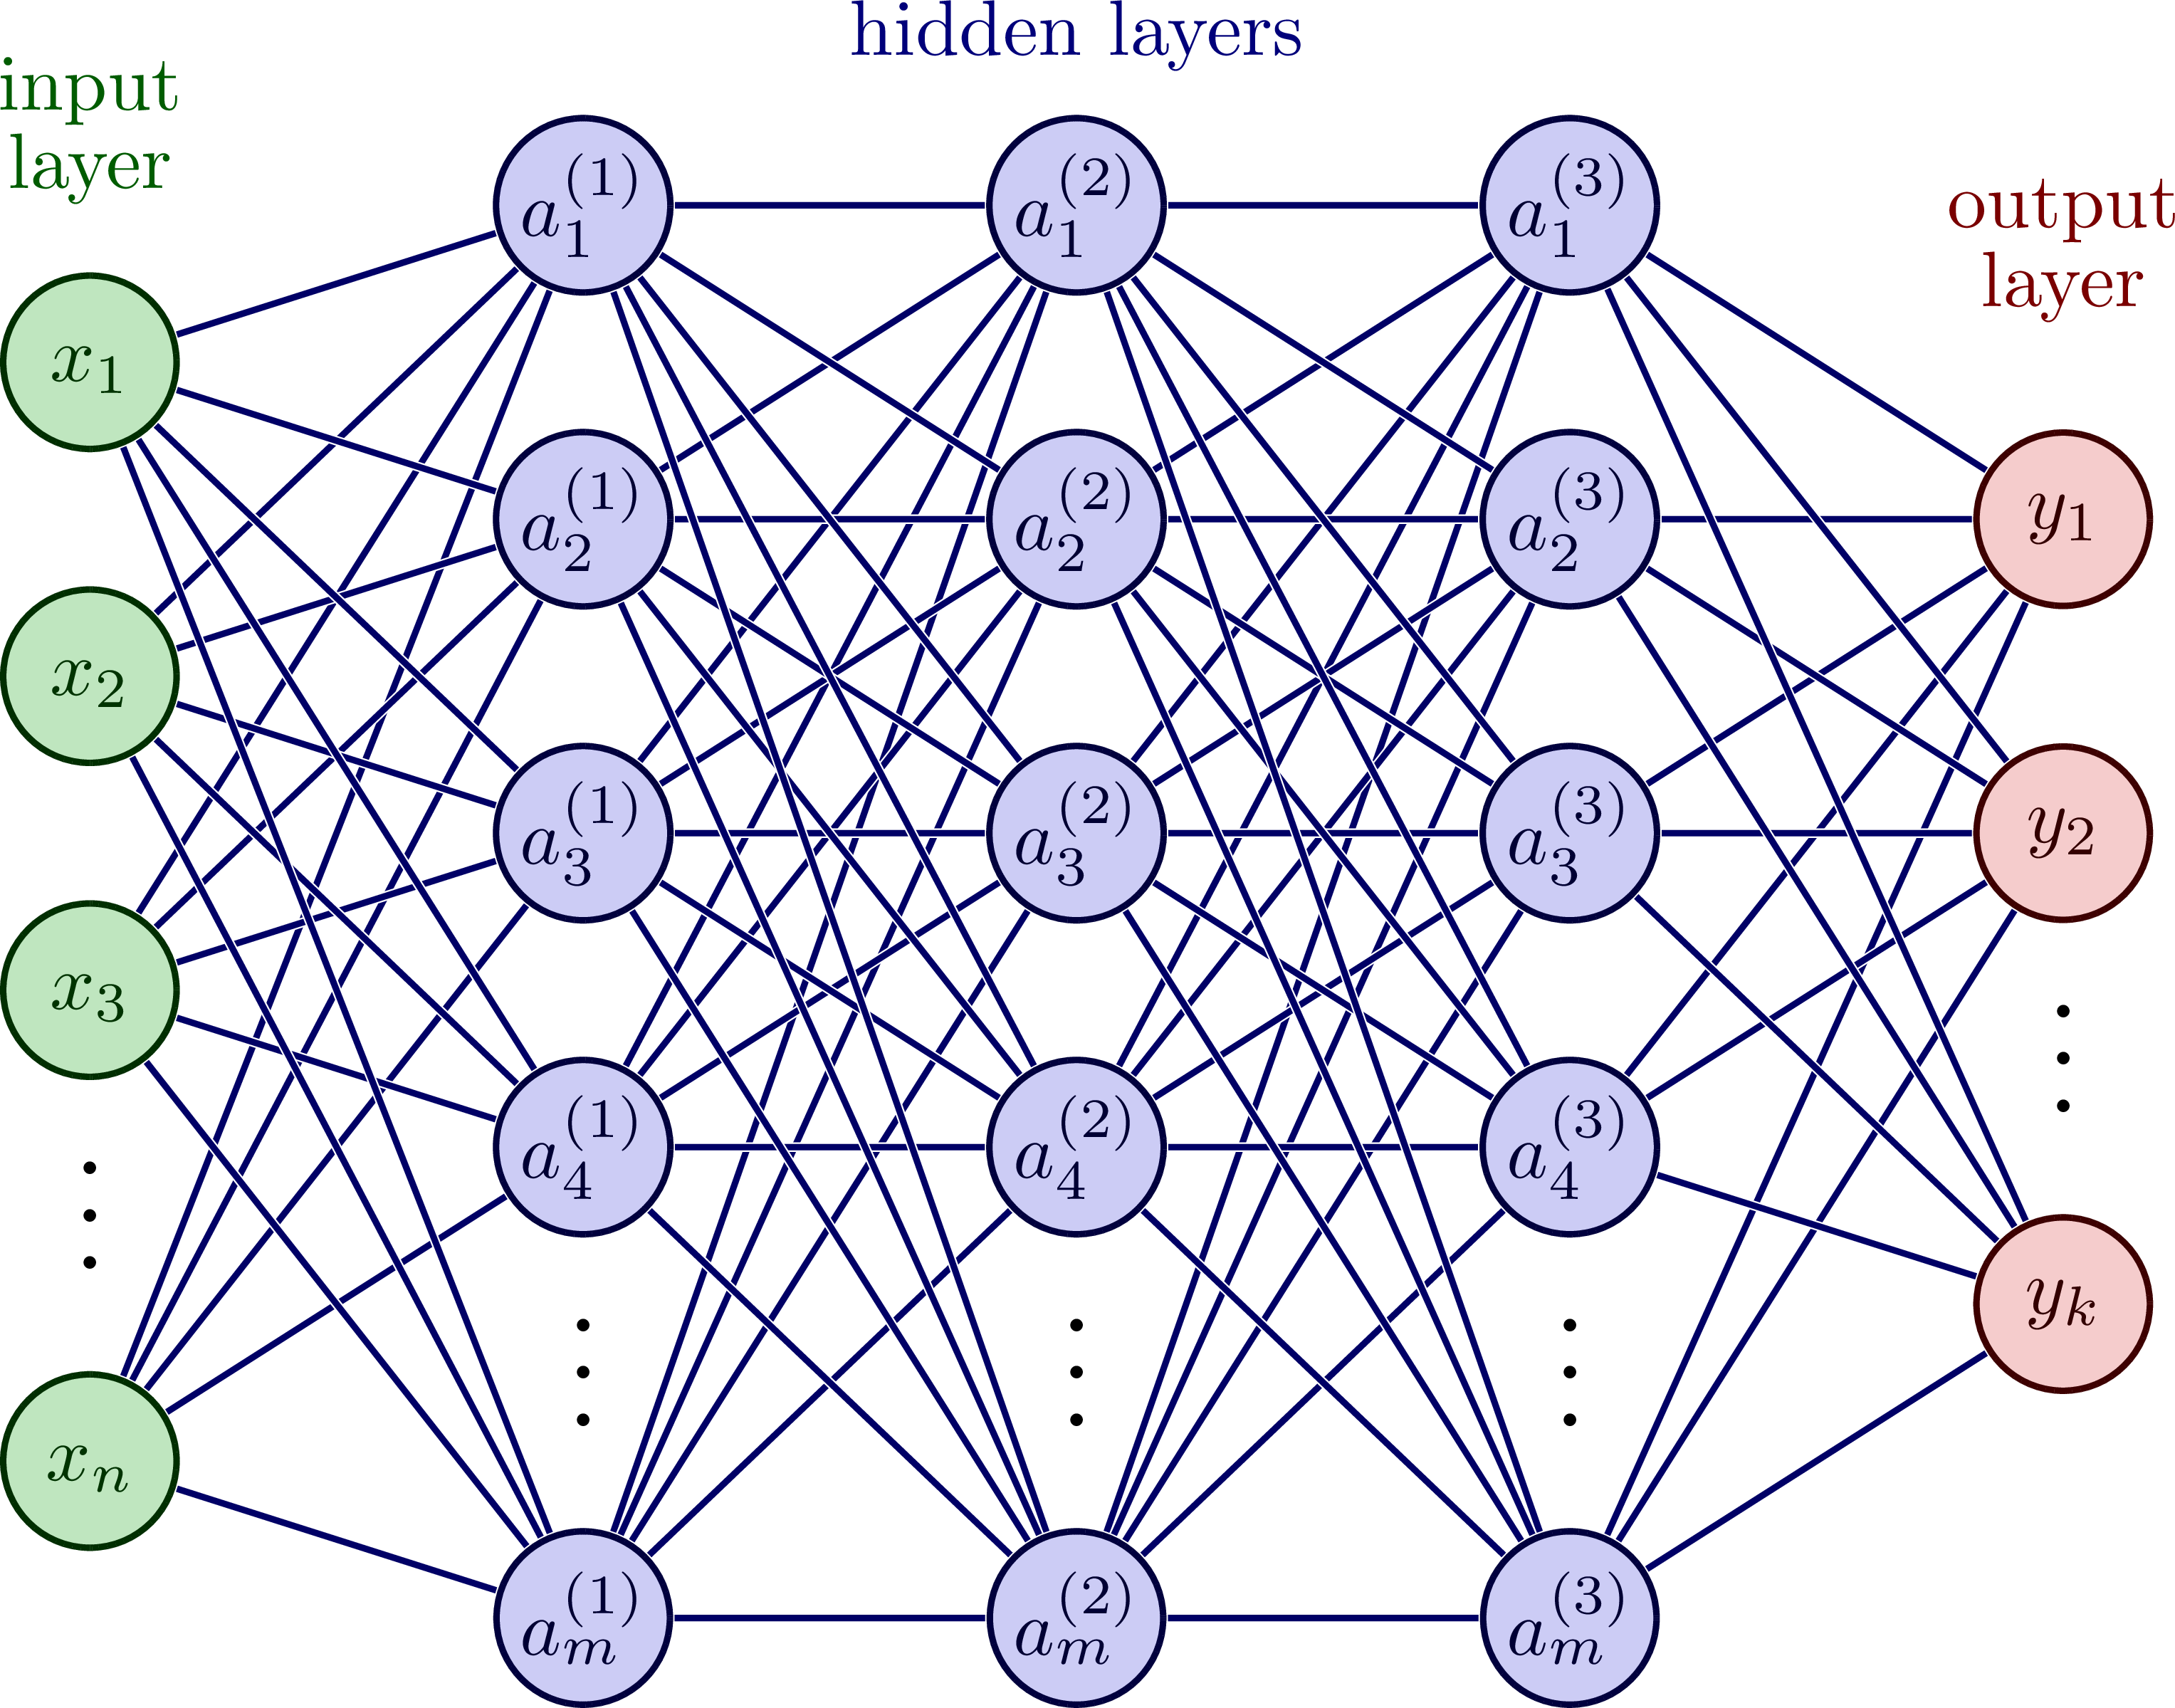

**Steps for Neural Networks:**
1. **Feature Engineering:**
Prepare and preprocess the data for input.

2. **Split the Data:**
Divide the data into training and test sets.

3. **Define Neural Network Architecture:**
Specify the number of layers, activation functions, and neurons.

4. **Forward Propagation:**
Calculate 𝑤 ⋅ 𝑥 + 𝑏 and apply activation functions.

5. **Loss Function:**
Compute loss (e.g., Cross-Entropy or MSE).

6. **Backpropagation and Parameter Updates:**
Update weights and biases using an optimizer (e.g., Gradient Descent).

7. **Evaluate Accuracy:**
Test the model and calculate performance metrics.

## Example 1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Preprocessing the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

# Step 2: Dataloaders
batch_size = 64
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Step 3: Definethe architecture of the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Step 4: Define hyperparameters and train the network
lr = 0.001
num_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")

# Step 5: Evaluate the network on the test set
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy}")

# Step 6: Visualization
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Training Loss')
plt.show()

## Example 2

In [ ]:
# (( let's assume we have a csv file to read the data from ))

# Step 1. Reading the file
df = pd.read_csv('###.csv')

# Step 2. Viewing the data
df.head()
# ---> after viewing the data we decide between couple things
# 1. if we can drop the unnecessary column(s)
# OR
# 2. if they have no classees so that we make classses for them.
# 3. or just proceed with the other preprocessing techniques

# Step 3.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,y,test_size=0.2, shuffle = True)

# Step 4. we ensure the data is in a format that can be converted to tensors and is suitable for numerical operations.

# Step 5. we convert the data into PyTorch tensors, allowing for deep learning model training and inference.

# Step 6. Fill the gaps
model = nn.Sequential(
    nn.Linear( , ),
    nn.Sigmoid(),
    nn.Linear( , ),
    nn.Sigmoid(),
    nn.Linear( , )
)

optimizer = optim.SGD(model.parameters(), lr = 1e-2) # lr = 0.001
critirion = nn.CrossEntropyLoss()

# Step 7. Fill the gaps

ls = []

for i in range(30):
  a = model()

  loss = critirion(a, )
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  ls.append(loss.item())

# Step 8.

y_hat = nn.functional.softmax(model(x), dim=1)
preditions = torch.argmax(y_hat, dim=1)
accuracy = torch.sum(preditions == y) / preditions.shape[0]

accuracy.item() * 100